In [1]:
import torch
import pickle
import numpy as np
import matplotlib.pyplot as plt

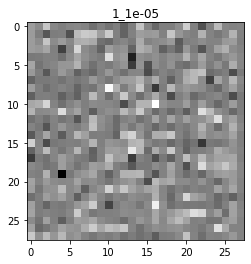

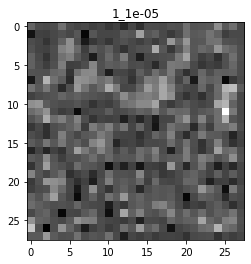

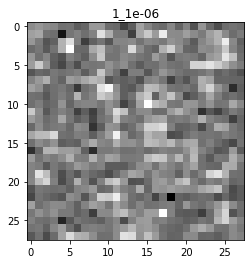

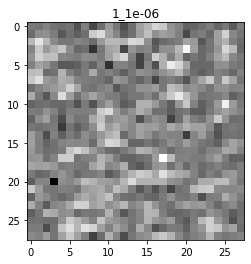

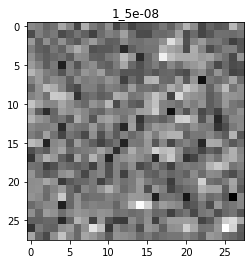

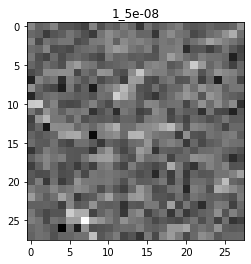

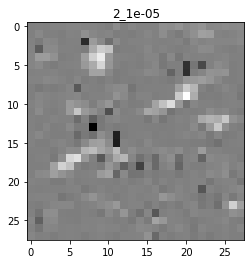

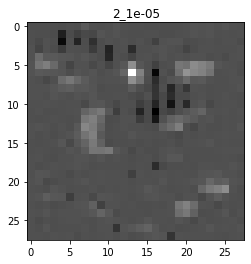

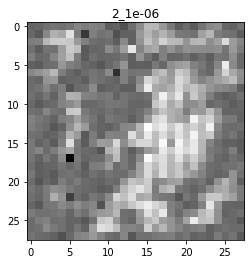

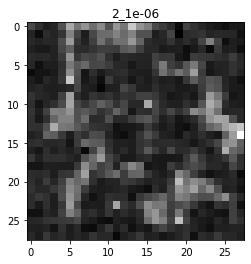

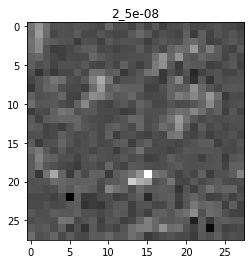

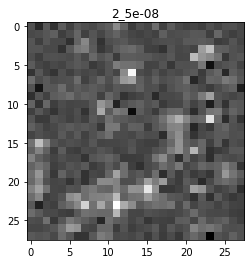

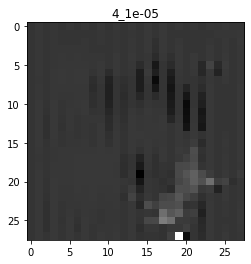

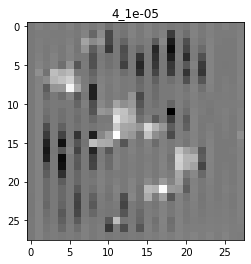

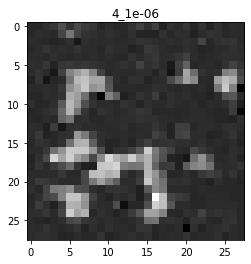

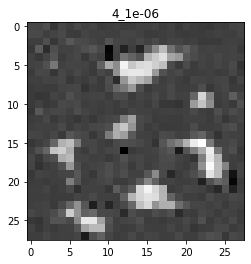

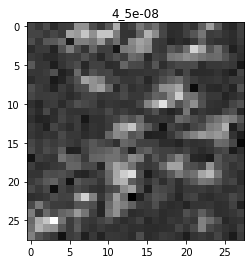

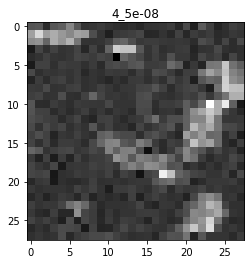

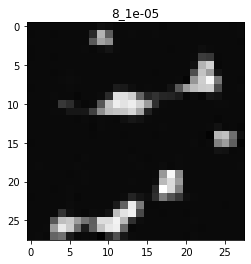

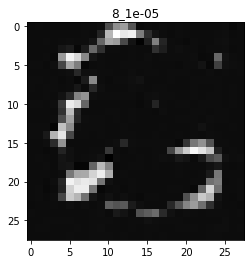

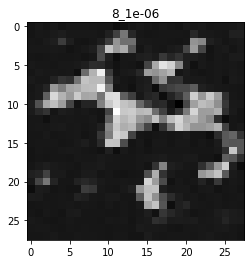

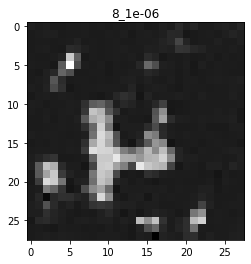

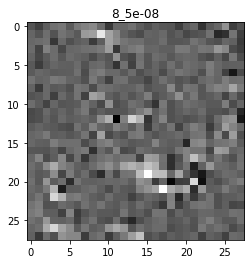

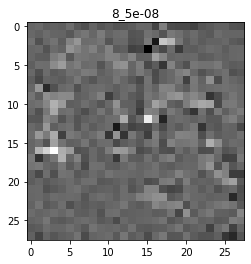

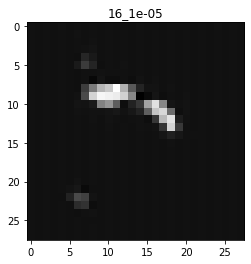

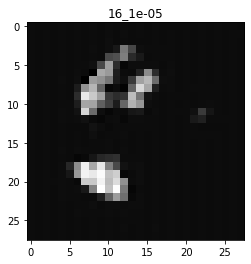

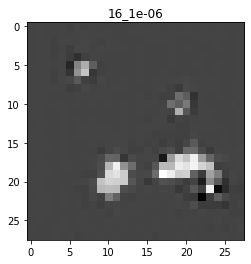

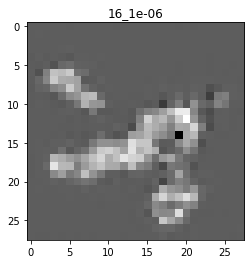

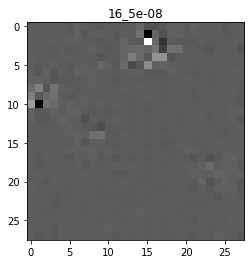

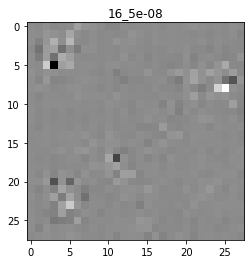

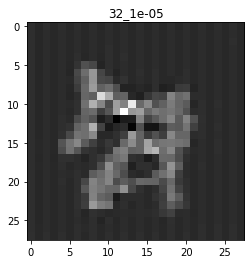

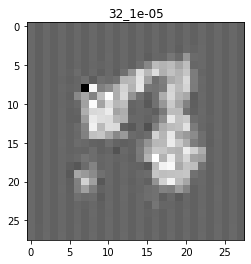

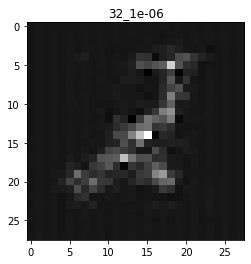

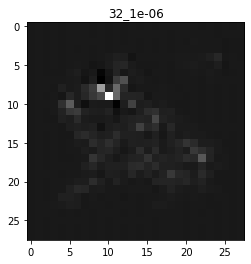

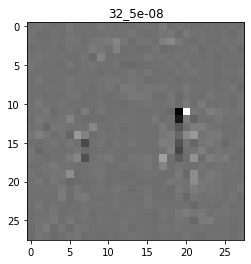

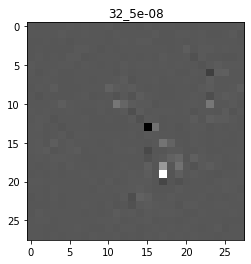

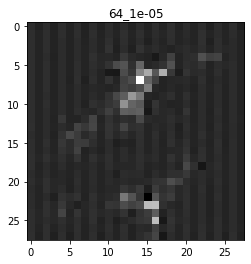

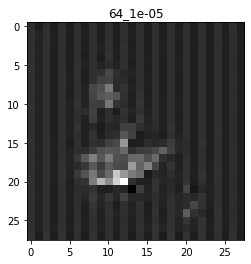

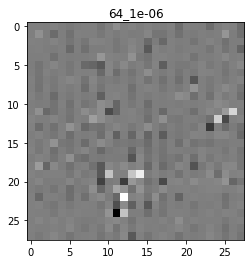

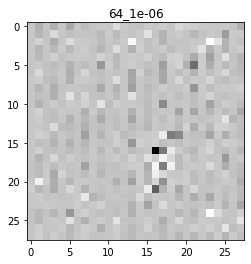

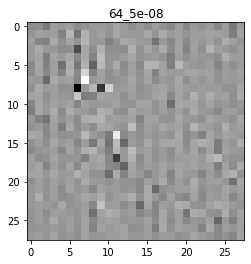

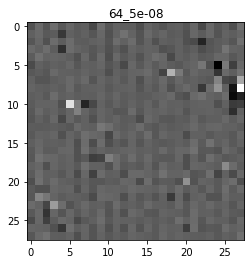

In [25]:
for size in [1,2,4,8,16,32,64]:
    for lr in ['1e-05','1e-06','5e-08']:
        with open(f'chkpt/mnist_samples_{size}_{lr}.pickle','rb') as in_file:
            samples = pickle.load(in_file)['sample']
        for sample in samples[:2]:
            plt.imshow(sample[0], cmap='gray')
            plt.title(f'{size}_{lr}')
            plt.show()


In [13]:
from acflow.coupling import AffineCoupling
from acflow import RealNVP
import torch

In [14]:
F = AffineCoupling(1, 4)
x = torch.randn((1,1,28,28))
mask = torch.arange(784) % 2
mask = mask.reshape((1,28,28))

In [15]:
y = F.f(x, mask)[0]

In [16]:
torch.norm(x - F.g(y, mask))

tensor(1.1040e-06, grad_fn=<CopyBackwards>)

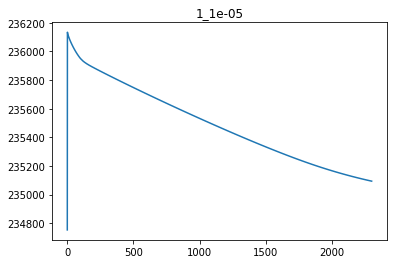

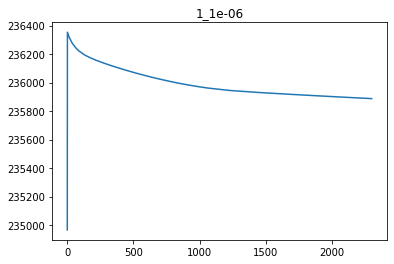

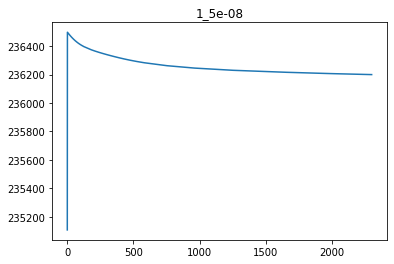

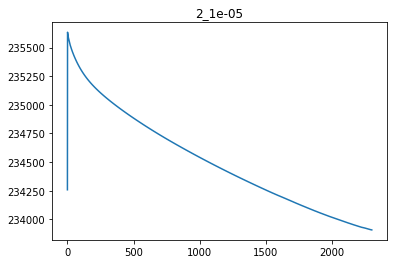

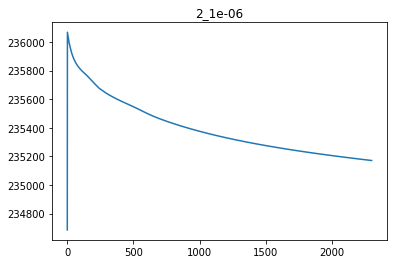

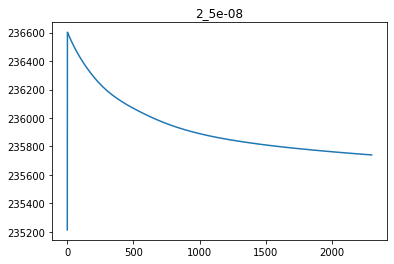

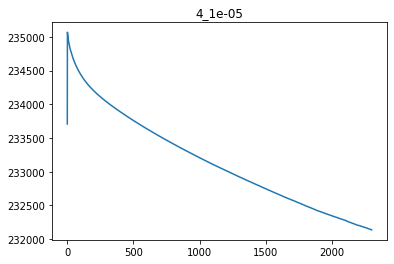

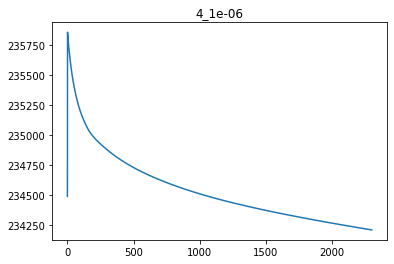

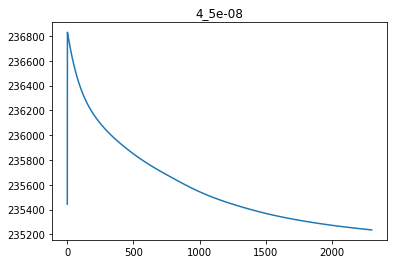

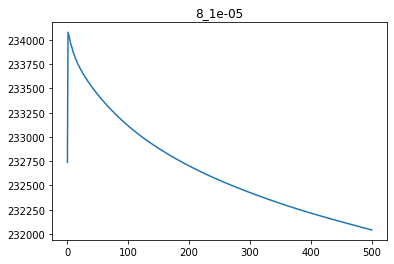

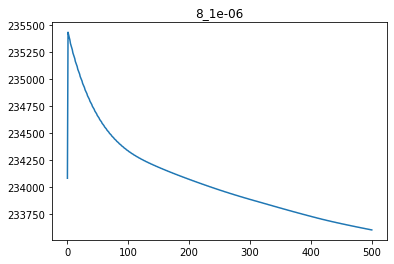

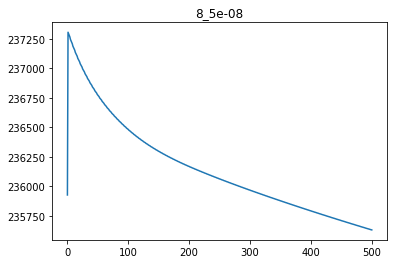

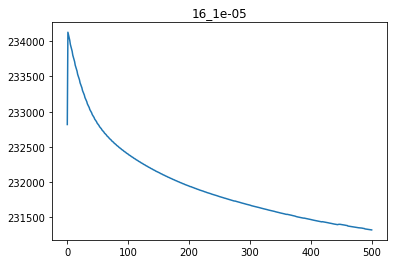

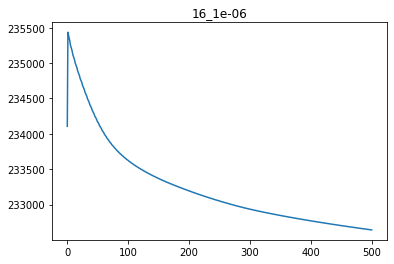

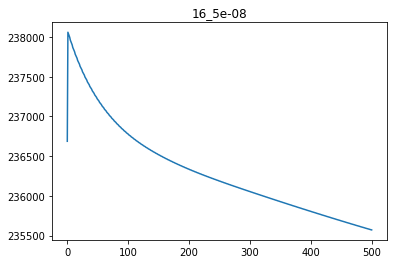

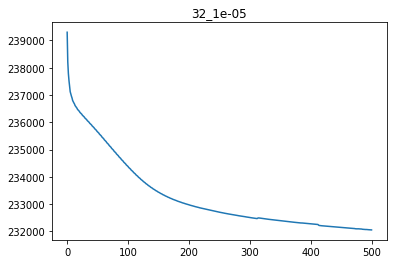

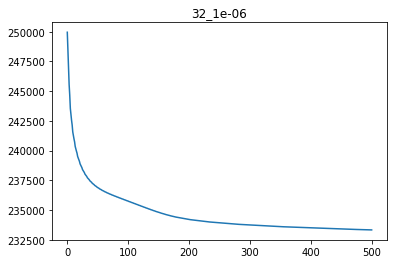

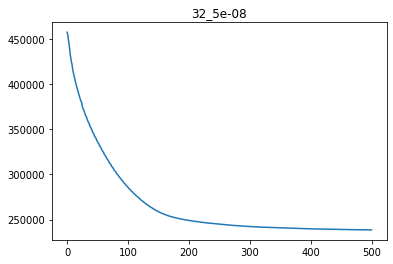

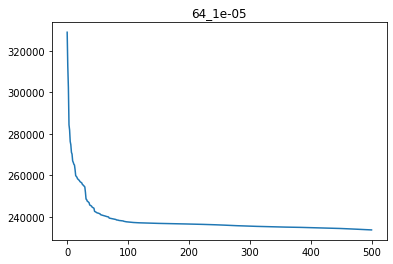

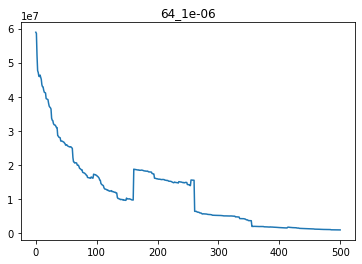

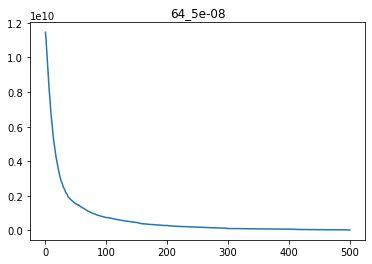

In [8]:
w = 100
for size in [1,2,4,8,16,32,64]:
    for lr in ['1e-05','1e-06','5e-08']:
        with open(f'chkpt/mnist_samples_{size}_{lr}.pickle','rb') as in_file:
            losses = np.array(pickle.load(in_file)['losses'])
        plt.plot(np.convolve(losses, np.ones(w), 'valid') / w)
        plt.title(f'{size}_{lr}')
        plt.show()